In [8]:
import sys
import json
import requests
from swgoh_stats import get_unit_stat_loc
from matplotlib import pyplot as plt
import seaborn as sns
from collections import defaultdict
import numpy as np
import pandas as pd
from swgoh_api import *
from collections import OrderedDict
from swgoh_stats import all_mods

In [5]:
unit_stat=get_unit_stat_loc("unitstat_engus.json")


d= defaultdict(list)

for key, value in unit_stat.items():
    d[value].append(key)

for key, value in d.items():
    if len(value)==2:
        unit_stat[value[1]]=key+", %"

In [9]:

allycode=int(input("Please enter the ally code of one of the guild's payer: "))
#project= {'language': 'eng_us','allycodes':928428534,'enums':True}
#project= {'language': 'eng_us','allycodes':allycode,'enums':True}
#one_payer=api_call(CONFIG, project, '%s/swgoh/players' % SWGOH_HELP)
guild=get_guild_full(CONFIG, allycode)
df=pd.DataFrame()
for g in guild:
    df=pd.concat([df,pd.DataFrame(data=g['roster'])])
df.set_index("allyCode",inplace=True)
df['gpChar'] = df['gpChar']/10**6
df['gpShip'] = df['gpShip']/10**6
df['gp'] = df['gp']/10**6

project= {'language': 'eng_us','allycodes':df.reset_index()["allyCode"].tolist(),'project':
          {'arena':1,'name':1,"allyCode":1,'guildRefId':1,"guildName":1,'roster':
           {'defId':1,'gear':1,'gp':1,"combatType":1}}}
players=api_call(CONFIG, project, '%s/swgoh/players' % SWGOH_HELP)
guildname=players[0]['guildName']
for player in players:
    df_player=pd.DataFrame(player['roster'])
    df.loc[player['allyCode'],'gp11+']=df_player[
        (df_player['combatType']==1) & (df_player['gear']>=11)]["gp"].sum()/10**6/df.loc[player['allyCode'],'gpChar']
    df.loc[player['allyCode'],'arena']=player['arena']['char']['rank']

Please enter the ally code of one of the guild's payer: 928428534


{'token_type': 'bearer', 'access_token': '991228965550e367c4d1a74bc87d19e9167340f2', 'expires_in': 3600}
Logged in successfully
{'token_type': 'bearer', 'access_token': '479b3435726c5364e72d3ab5a7b453cc9b940d26', 'expires_in': 3600}
Logged in successfully


In [11]:
list_of_rows=[]
for i in range(0,1,1):#len(df)
    project= {'language': 'eng_us', 'enums':False,'allycodes':df.iloc[i:i+1].reset_index()["allyCode"].tolist(),'project':
              {"allyCode":1, 'name':1, 'roster':
               {'nameKey':1, 'mods':1}}}
    players=api_call(CONFIG, project, '%s/swgoh/players' % SWGOH_HELP)
    for player in players:
        list_of_rows.extend(all_mods(player))
all_guild_mods=pd.DataFrame(list_of_rows)

{'token_type': 'bearer', 'access_token': '1641186fc7236be5571d94edca0e8bd8aa0fb722', 'expires_in': 3600}
Logged in successfully


In [ ]:
#all_guild_mods.sort_values(5,ascending=False).head()

In [12]:
all_guild_mods=all_guild_mods[all_guild_mods.columns[:10].union(all_guild_mods.columns[10:].sort_values(),sort=False)]

In [14]:
#idx=all_guild_mods.columns[10:].to_numpy()

In [23]:
rename={i:unit_stat[str(i)] for i in all_guild_mods.columns[10:]}

all_guild_mods.rename(rename,axis=1,inplace=True)

In [15]:
#all_guild_mods.columns[10:]=all_guild_mods.columns[10:].map(str).map(unit_stat)

In [16]:
#rename=all_guild_mods.columns[10:].map(str).map(unit_stat)
#rename=dict(zip(all_guild_mods.columns[10:],all_guild_mods.columns[10:].map(str).map(unit_stat)))

In [86]:
pd.Series.map

AttributeError: module 'pandas' has no attribute 'map'

In [26]:
all_guild_mods['primary stat']=all_guild_mods['primary stat'].map(str).map(unit_stat)

In [18]:
#cols = dict()
#for c in all_guild_mods.columns[10:]:
#    cols.update({c:unit_stat[str(c)]})
#all_guild_mods.rename(cols,axis=1)

In [19]:
#all_guild_mods.rename(unit_stat,axis=1)

In [20]:
#cols

In [21]:
#all_guild_mods.rename(cols,axis=1)

In [27]:
all_guild_mods

,id,allyCode,Name,Character,Slot,tier,pips,lvl,set,primary stat,...,Potency,Tenacity,Protection,Offense,Defense,"Offense, %","Defense, %","Critical Chance, %","Health, %","Protection, %"
0,IlbkCM-CSR2MBHqnrLXfGA,695141142,JAYBIRD,Magmatrooper,1,5,5,15,8,"Offense, %",...,3.425,4.548,1243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AC_EVxY3STKYBQj0ycYeEQ,695141142,JAYBIRD,Magmatrooper,2,2,5,15,6,"Offense, %",...,NaN,NaN,809.0,74.0,NaN,NaN,1.470,NaN,NaN,1.747
2,gxyLN4znQ1iZLdN08r5LTA,695141142,JAYBIRD,Magmatrooper,3,3,5,15,4,"Defense, %",...,NaN,NaN,1358.0,NaN,NaN,NaN,NaN,3.437,NaN,NaN
3,0BwA--HlSqGM787_f_XAvw,695141142,JAYBIRD,Magmatrooper,4,4,5,15,8,"Critical Chance, %",...,NaN,4.007,NaN,24.0,NaN,NaN,1.433,NaN,NaN,NaN
4,lz98uVsPQHaM844WH53BIg,695141142,JAYBIRD,Magmatrooper,5,4,5,15,8,"Protection, %",...,1.948,1.580,NaN,117.0,13.0,NaN,NaN,NaN,NaN,NaN
5,0FAaqDlpTs6E5bmb_Z3IHg,695141142,JAYBIRD,Magmatrooper,6,5,5,15,8,Tenacity,...,NaN,NaN,1894.0,77.0,NaN,0.906,1.624,NaN,NaN,NaN
6,JF8wEcIDR1-cU4Qgvc96-w,695141142,JAYBIRD,Hermit Yoda,1,5,5,15,1,"Offense, %",...,NaN,1.994,NaN,NaN,NaN,NaN,NaN,3.309,NaN,NaN
7,YtOg8k-QTYWoEvT9XdBEwA,695141142,JAYBIRD,Hermit Yoda,2,2,5,15,5,Speed,...,1.148,NaN,NaN,37.0,NaN,NaN,3.104,NaN,NaN,1.144
8,mkJRukuHTqagdWvT5rWF9A,695141142,JAYBIRD,Hermit Yoda,3,5,5,15,7,"Defense, %",...,NaN,2.200,NaN,NaN,NaN,NaN,NaN,1.933,NaN,NaN
9,3SH8oWhISkWPIimIwWrs-A,695141142,JAYBIRD,Hermit Yoda,4,5,5,15,1,"Defense, %",...,4.283,NaN,NaN,NaN,4.0,0.534,NaN,NaN,NaN,NaN


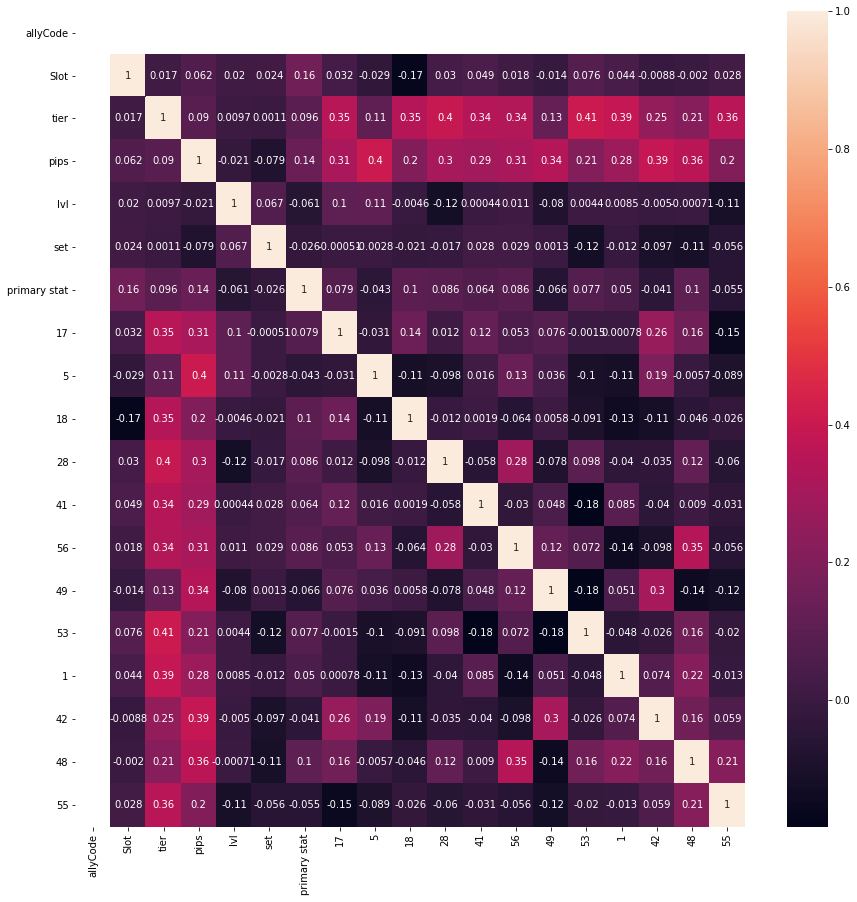

In [74]:
plt.figure(figsize=(15,15))
sns.heatmap(all_guild_mods.corr(),annot=True)

/home/motornyi/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/motornyi/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 1080x1080 with 0 Axes>

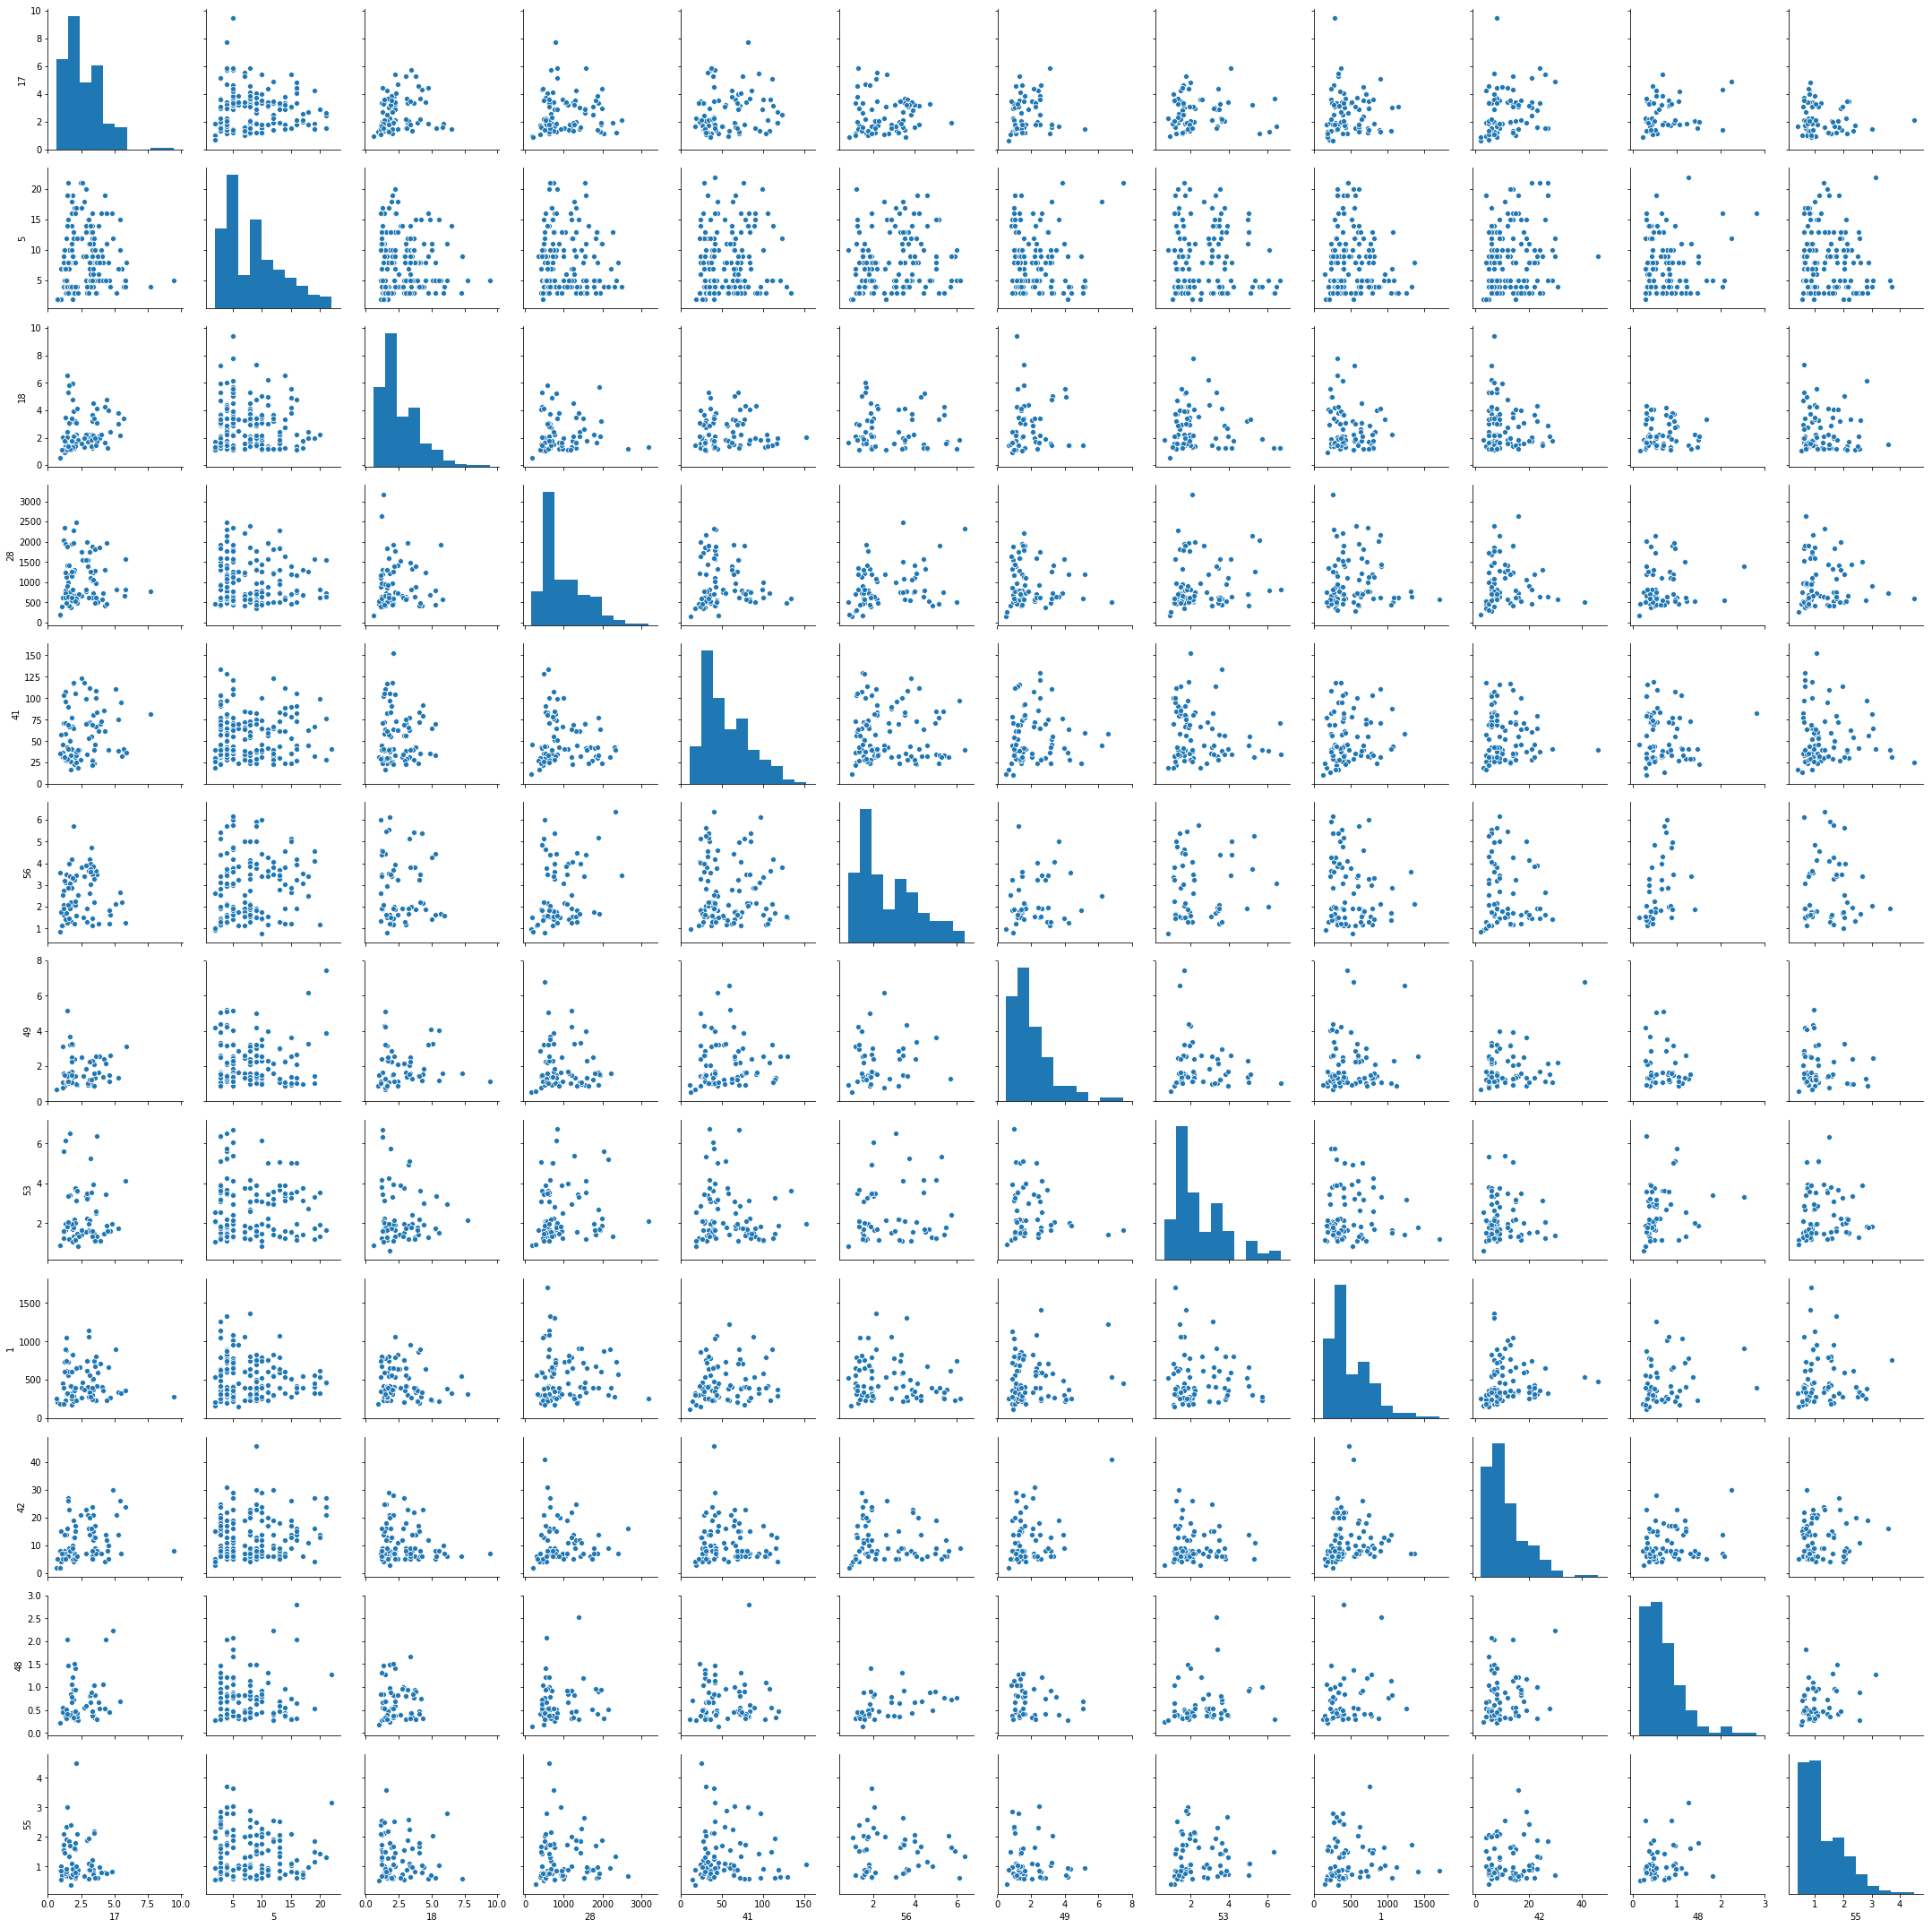

In [13]:
plt.figure(figsize=(15,15))
sns.pairplot(data=all_guild_mods[all_guild_mods.columns[10:]])